---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

## Get Necessary tools

In [27]:
# Data Visualization will be needed to  asses the quality of our model
%matplotlib notebook
import matplotlib.pyplot as plt

# Data manipulation tools
import pandas as pd
import numpy as np

# Machine learning modules from Scikit-Learn
# Extremely important to create a training set and a test set from our data to prevent overfitting
from sklearn.model_selection import train_test_split
# Model weel suited for mixted feature types and quick with prediction
# Import DummyClassifier to test score for predicting the majority class
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
# Strings cannot be passed in the fit() method of our classifier, preprocessing is needed
from sklearn import preprocessing
# Use of other evaluation metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc


# I- Training data and model creation

## Data extraction and manipulation - Training file

In [65]:
train_df = pd.read_csv('train.csv', encoding='cp1252',  
                 dtype={'zip_code': str,
                        'non_us_str_code': str,
                        'grafitti_status': str,
                        'violator_name':str, 
                        'mailing_address_str_number': str})

# Keeping only compliance True or False (0 or 1)
train_df = train_df[(train_df['compliance'] == 0) | (train_df['compliance'] == 1)]

# Creating our feature list and binary target labels 
# Dropping unwanted columns : columns not present in test data (to judgment amount and then adding grafitti status so payment date and others are dropped)
# otherwise this would create an error in the model (30 features for the training and only 27 for test) 
X = train_df.loc[:, 'ticket_id':'judgment_amount']
X['grafitti_status'] = train_df['grafitti_status']

y = train_df.iloc[:, -1]
y = y.astype(int)

# Fit method does not accept strings so preprocessing is needed
# Lots of missing values (NaN : float) replace the NaN values so all column is string type
X = X.fillna('')

# Only columns with type "object" need to be preprocessed with our sklearn module (not forgetting to add the other columns back
le = preprocessing.LabelEncoder()
X_bis = X.select_dtypes(include=[object]).apply(le.fit_transform)
# Adding columns with types other than "object"
other_columns = ['ticket_id', 'violation_street_number', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee',
                 'discount_amount', 'clean_up_cost', 'judgment_amount']
X_bis[other_columns] = X[other_columns]


## Set creation - Model Training and Evaluation

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_bis, y, random_state= 0)

gbt = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, random_state= 0).fit(X_train, y_train)
gbt_score_training = gbt.score(X_train, y_train)
gbt_score_validation = gbt.score(X_test, y_test)

print("Gradient Boosted Decision Tree training score : {:.2f}".format(gbt_score_training))
print("Gradient Boosted Decision Tree validation score : {:.2f}".format(gbt_score_validation))

Gradient Boosted Decision Tree training score : 0.94
Gradient Boosted Decision Tree validation score : 0.94


Accuracy score seems okay but seems too good to be true, let's compare it with a DummyClassifier score

In [67]:
dummy_majority = DummyClassifier(strategy= 'most_frequent').fit(X_train, y_train)
dummy_score = dummy_majority.score(X_test, y_test)

print("Dummy score : {:.2f}".format(dummy_score))

Dummy score : 0.93


It seems our scores are not that good since there are very close to the dummy score. Intuitively we can suppose our classes are highly unbalanced. Let's use another evaluation metric like AUCROC

<IPython.core.display.Javascript object>


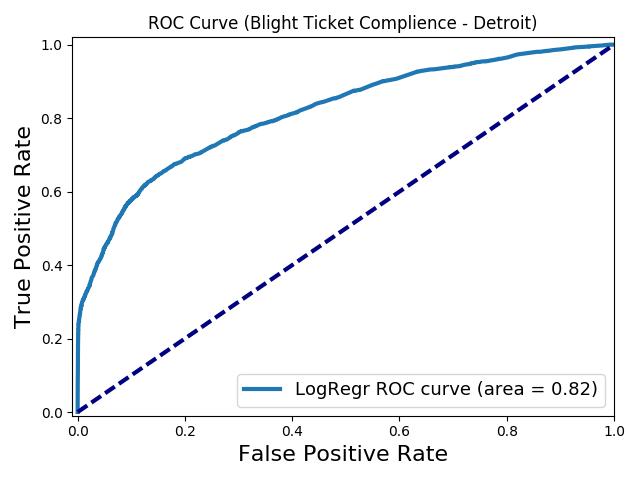

In [103]:
# Compute classifier score
gbt_scores = gbt.decision_function(X_test)

# ROC curve and Area Under the curve
false_positive_rate, true_positive_rate, thresholds_roc = roc_curve(y_test, gbt_scores)

auc_score = roc_auc_score(y_test, gbt_scores)

'''
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.02])
plt.plot(false_positive_rate, true_positive_rate, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(auc_score))
plt.title('ROC Curve (Blight Ticket Complience - Detroit)')
plt.xlabel('False Positive Rate', size= 16)
plt.ylabel('True Positive Rate', size= 16)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=13)
plt.tight_layout()
'''

# II- Run the model and make predictions

## Data extraction and manipulation - Test file

In [109]:
test_df = pd.read_csv('readonly/test.csv', encoding='cp1252',  dtype={'zip_code': str,
                                                                      'non_us_str_code': str,
                                                                      'grafitti_status': str,
                                                                      'violator_name':str, 
                                                                      'mailing_address_str_number': str})

# Add column for target prediction (compliance or not)
test_df['compliance'] = ''

# Creating our feature list and binary target labels 
# Dropping unwanted columns : columns not present in test data
X_predict = test_df.loc[:, 'ticket_id':'judgment_amount']
X_predict['grafitti_status'] = test_df['grafitti_status']

y_predict = test_df.iloc[:, -1].as_matrix()

# Fit method does not accept strings so preprocessing is needed
# Lots of missing values (NaN : float) replace the NaN values so all column is string type
X_predict = X_predict.fillna('')

# Only columns with type "object" need to be preprocessed with our sklearn module (not forgetting to add the other columns back
le = preprocessing.LabelEncoder()
X_predict_bis = X_predict.select_dtypes(include=[object]).apply(le.fit_transform)
# Adding columns with types other than "object"
X_predict_bis[other_columns] = X_predict[other_columns]

## Passing our data to the Gradient Boosted Model

In [111]:
gbt_predictions = gbt.predict_proba(X_predict_bis)[:, 1]

In [112]:
# Probability blight ticket will be paid
def blight_model():
    blight = pd.Series(gbt_predictions, index = test_df.ticket_id, name='compliance')

    return blight

In [113]:
blight_model()

ticket_id
284932    0.340564
285362    0.232038
285361    0.346561
285338    0.362259
285346    0.381173
285345    0.362259
285347    0.381173
285342    0.858938
285530    0.256362
284989    0.306270
285344    0.387129
285343    0.292426
285340    0.257372
285341    0.365533
285349    0.378241
285348    0.359388
284991    0.306270
285532    0.307395
285406    0.278987
285001    0.310052
285006    0.270357
285405    0.234264
285337    0.281498
285496    0.373522
285497    0.367321
285378    0.234264
285589    0.281498
285585    0.328453
285501    0.383392
285581    0.232038
            ...   
376367    0.150397
376366    0.168634
376362    0.170386
376363    0.227035
376365    0.150397
376364    0.168634
376228    0.200171
376265    0.181933
376286    0.827297
376320    0.197346
376314    0.168634
376327    0.856449
376385    0.851513
376435    0.863009
376370    0.856449
376434    0.239290
376459    0.265298
376478    0.129699
376473    0.170386
376484    0.168889
376482    0.121317
37